In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(array([ 6., 26., 18., 30.,  2., 24., 40., 15., 16.,  9., 64., 14.,  0.,
        14., 20., 17., 24.,  2., 11., 22.]),
 array([27. , 28.6, 30.2, 31.8, 33.4, 35. , 36.6, 38.2, 39.8, 41.4, 43. ,
        44.6, 46.2, 47.8, 49.4, 51. , 52.6, 54.2, 55.8, 57.4, 59. ]),
 <BarContainer object of 20 artists>)

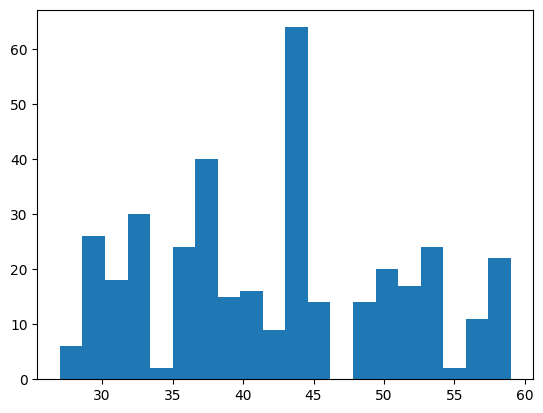

In [8]:
plt.hist(df['Age'], bins=20)

(array([ 6., 31., 37., 13.,  9., 46.,  5.,  5.,  3., 19., 36., 19.,  5.,
        10., 52.,  7., 13., 26.,  5., 27.]),
 array([5.8  , 5.935, 6.07 , 6.205, 6.34 , 6.475, 6.61 , 6.745, 6.88 ,
        7.015, 7.15 , 7.285, 7.42 , 7.555, 7.69 , 7.825, 7.96 , 8.095,
        8.23 , 8.365, 8.5  ]),
 <BarContainer object of 20 artists>)

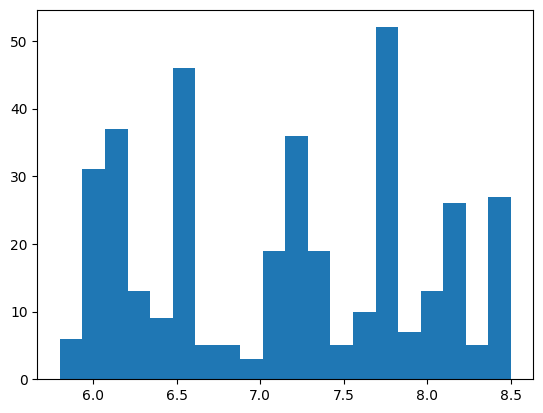

In [9]:
plt.hist(df['Sleep Duration'], bins=20)

In [16]:
df['Stress Level']

0      6
1      8
2      8
3      8
4      8
      ..
369    3
370    3
371    3
372    3
373    3
Name: Stress Level, Length: 374, dtype: int64

Text(0, 0.5, 'Stress Level')

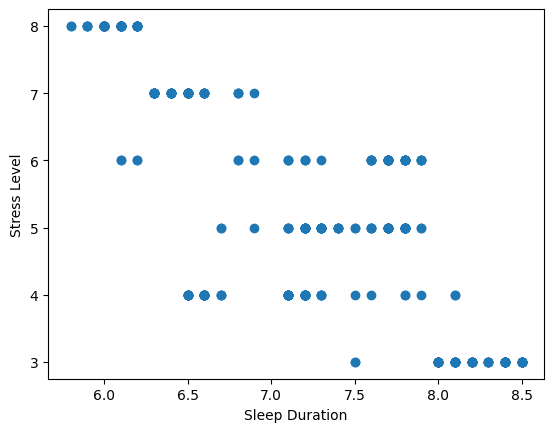

In [20]:
plt.scatter(df['Sleep Duration'], df['Stress Level'])
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")